# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('dados/housing.csv')
X = df.drop(columns='median_house_value')
y = df['median_house_value']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [4]:
y.to_frame().head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.drop('ocean_proximity',
  axis='columns', inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
# Verificação das variáveis. 
# Scikit-learn não aceita variáveis string nem missing.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [8]:
df.corr().tail(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.045967,-0.14416,0.105623,0.134153,0.049686,-0.02465,0.065843,0.688075,1.0


In [9]:
# Gerando a matriz de correlação
matriz_corr = df.corr()
matriz_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


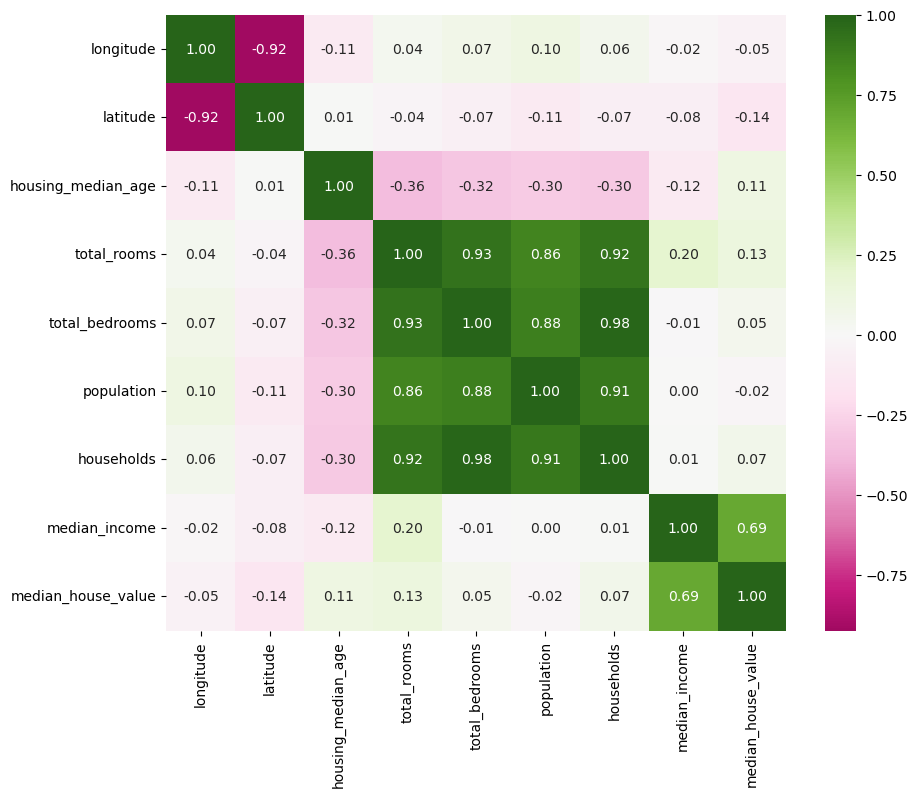

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='PiYG', fmt=".2f", center=0)
plt.show()

### 3. Separe os dados em validação e teste

In [11]:
X.drop('ocean_proximity',
  axis='columns', inplace=True)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [13]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [14]:
mse1_train = mean_squared_error(y_true=y_train, y_pred=regr_1.predict(X_train))
mse1_test = mean_squared_error(y_true=y_test, y_pred=regr_1.predict(X_test))

mse2_train = mean_squared_error(y_true=y_train, y_pred=regr_2.predict(X_train))
mse2_test = mean_squared_error(y_true=y_test, y_pred=regr_2.predict(X_test))

template = 'O erro quadrático médio (MSE) da árvore com profunidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(regr_1.get_depth(), 'treino', mse1_train).replace('.', ','))
print(template.format(regr_1.get_depth(), 'teste', mse1_test).replace('.', ','), '\n')

print(template.format(regr_2.get_depth(), 'treino', mse2_train).replace('.', ','))
print(template.format(regr_2.get_depth(), 'teste', mse2_test).replace('.', ','))

O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de treino é: 3631462701,96
O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de teste é: 4332516879,39 

O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de treino é: 7411385612,54
O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de teste é: 7225244557,01


In [15]:
r2_1_train = regr_1.score(X=X_train, y=y_train)
r2_2_train = regr_2.score(X=X_train, y=y_train)

r2_1_test = regr_1.score(X=X_test, y=y_test)
r2_2_test = regr_2.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(regr_1.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(regr_1.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')

print(template.format(regr_2.get_depth(), 'treino', r2_2_train).replace(".", ","))
print(template.format(regr_2.get_depth(), 'teste', r2_2_test).replace(".", ","))

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,73
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,66 

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de treino é: 0,45
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de teste é: 0,44


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

O MSE da arvore com profundidade = 2 parece melhor que o, MSE da arvore com profundidade = 8 que parece ter sofrido um overfitting.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

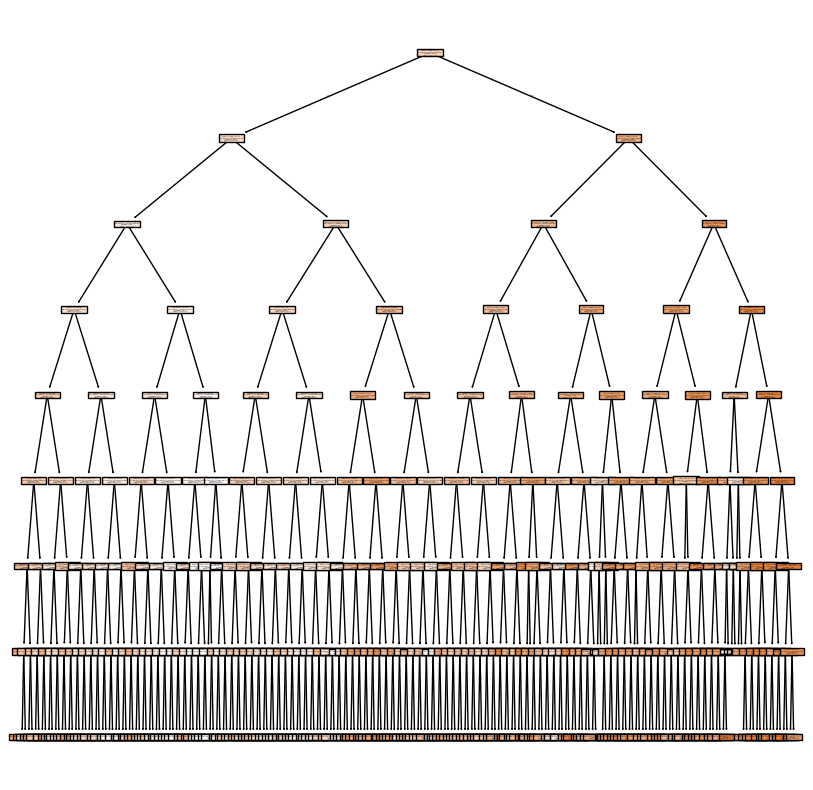

In [16]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True)
plt.show()

In [86]:
text_tree_print = tree.export_text(decision_tree=regr_1)

print(text_tree_print)

|--- feature_7 <= 5.08
|   |--- feature_7 <= 3.07
|   |   |--- feature_1 <= 34.45
|   |   |   |--- feature_0 <= -118.31
|   |   |   |   |--- feature_0 <= -118.35
|   |   |   |   |   |--- feature_1 <= 34.16
|   |   |   |   |   |   |--- feature_0 <= -118.42
|   |   |   |   |   |   |   |--- feature_7 <= 2.97
|   |   |   |   |   |   |   |   |--- value: [347451.20]
|   |   |   |   |   |   |   |--- feature_7 >  2.97
|   |   |   |   |   |   |   |   |--- value: [431550.33]
|   |   |   |   |   |   |--- feature_0 >  -118.42
|   |   |   |   |   |   |   |--- feature_1 <= 34.05
|   |   |   |   |   |   |   |   |--- value: [201273.81]
|   |   |   |   |   |   |   |--- feature_1 >  34.05
|   |   |   |   |   |   |   |   |--- value: [363612.20]
|   |   |   |   |   |--- feature_1 >  34.16
|   |   |   |   |   |   |--- feature_0 <= -119.42
|   |   |   |   |   |   |   |--- feature_5 <= 690.00
|   |   |   |   |   |   |   |   |--- value: [321592.93]
|   |   |   |   |   |   |   |--- feature_5 >  690.00
|   |   